<a href="https://colab.research.google.com/github/rasyiqahizzati/sql_airasia/blob/main/Introduction_to_SQL_Complete_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to SQL - Complete Exercise
Download and upload the file [staff.sqlite](https://drive.google.com/file/d/17JdP9PASgwKO5G3nNoxtb6wvjssU3we7/view?usp=sharing) to the current session.


For sessions using Google BigQuery SQL Workspace, download the csv files from [HERE](https://drive.google.com/drive/folders/1h4LDoXR37NHUGI-cDJUeZ_iuGT1Ub6aC?usp=sharing).

## Initialization

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
dbconnection = sqlite3.connect('staff.sqlite')
c = dbconnection.cursor()

query = "SELECT name FROM sqlite_master WHERE type = 'table'"
print(c.execute(query).fetchall())

The structure of `staff.sqlite` database:

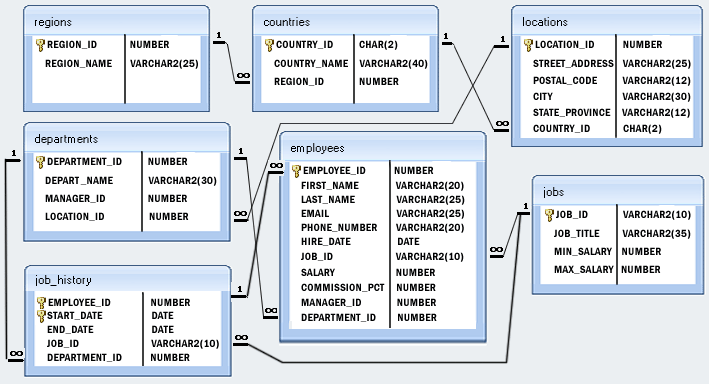

## Examples

In [ ]:
query = """

SELECT DEPART_NAME AS 'Department Name'
FROM departments

"""

result = c.execute(query).fetchall();
print(result)

[('Administration',), ('Marketing',), ('Purchasing',), ('Human Resources',), ('Shipping',), ('IT',), ('Public Relations',), ('Sales',), ('Executive',), ('Finance',), ('Accounting',), ('Treasury',), ('Corporate Tax',), ('Control And Credit',), ('Shareholder Services',), ('Benefits',), ('Manufacturing',), ('Construction',), ('Contracting',), ('Operations',), ('IT Support',), ('NOC',), ('IT Helpdesk',), ('Government Sales',), ('Retail Sales',), ('Recruiting',), ('Payroll',)]


*Example:*  
Write a query to list department id, name for all the departments in which there are no employees in the department

In [ ]:
query = """

SELECT DISTINCT department_id
FROM employees

"""

pd.read_sql_query(query, dbconnection)

,department_id
0,90
1,60
2,100
3,30
4,50
5,80
6,0
7,10
8,20
9,40


In [ ]:
query = """

SELECT department_id as ID, depart_name AS 'Department Name'
FROM departments
WHERE department_id
NOT IN
  (SELECT DISTINCT department_id
   FROM employees)

"""

pd.read_sql_query(query, dbconnection)

,ID,Department Name
0,120,Treasury
1,130,Corporate Tax
2,140,Control And Credit
3,150,Shareholder Services
4,160,Benefits
5,170,Manufacturing
6,180,Construction
7,190,Contracting
8,200,Operations
9,210,IT Support


*Example:*  
Write a query to find the name/s (first_name, last_name), the salary of the employee/s who earn more than the average salary and who work/s in any of the IT departments.

In [ ]:
# to get average salary

query = """

SELECT AVG(salary)
FROM employees

"""

pd.read_sql_query(query, dbconnection)

,AVG(salary)
0,6461.682243


In [ ]:
# find the department names

query = """

SELECT DISTINCT department_id
FROM departments
WHERE depart_name LIKE 'IT%'

"""

pd.read_sql_query(query, dbconnection)

,department_id,depart_name
0,60,IT
1,210,IT Support
2,230,IT Helpdesk


In [ ]:
query = """

SELECT first_name, last_name, salary
FROM employees
WHERE salary > 6461.682243
AND department_id IN (60, 210, 230)

"""

pd.read_sql_query(query, dbconnection)

,first_name,last_name,salary
0,Alexander,Hunold,9000


In [ ]:
query = """

SELECT first_name, last_name, salary
FROM employees
WHERE salary >
  (
    SELECT AVG(salary)
    FROM employees
  )
AND department_id IN
  (
    SELECT DISTINCT department_id
    FROM departments
    WHERE depart_name LIKE 'IT%'
  )

"""

pd.read_sql_query(query, dbconnection)

,first_name,last_name,salary
0,Alexander,Hunold,9000


## Exercise

Write suitable SQL codes to make the queries as per instructed. When necessary (if you are more familiar with R), you may make use of dbplyr functions to help to translate the R to SQL.

**NOTE: Must TRY Question #22**.


1:  Write a query to display the names (`first_name`, `last_name`) using alias name "**First Name**", "**Last Name**"


,First Name,Last Name
0,Steven,King
1,Neena,Kochhar
2,Lex,De Haan
3,Alexander,Hunold
4,Bruce,Ernst
...,...,...
102,Pat,Fay
103,Susan,Mavris
104,Hermann,Baer
105,Shelley,Higgins


2: Write a query to get unique department ID from `employee` table

,department_id
0,90
1,60
2,100
3,30
4,50
5,80
6,0
7,10
8,20
9,40


3： Write a query to get the names (`first_name`, `last_name`), `salary`, `EPF` of all the employees (EPF is calculated as 12% of salary)

In [ ]:
"""

SELECT first_name, last_name, salary, 0.12*salary AS EPF


"""

,first_name,last_name,salary,EPF
0,Steven,King,24000,2880.0
1,Neena,Kochhar,17000,2040.0
2,Lex,De Haan,17000,2040.0
3,Alexander,Hunold,9000,1080.0
4,Bruce,Ernst,6000,720.0
...,...,...,...,...
102,Pat,Fay,6000,720.0
103,Susan,Mavris,6500,780.0
104,Hermann,Baer,10000,1200.0
105,Shelley,Higgins,12000,1440.0


4: Write a query to get the employee ID, names (first_name, last_name), salary in ascending order of salary

,employee_id,first_name,last_name,salary
0,132,TJ,Olson,2100
1,128,Steven,Markle,2200
2,136,Hazel,Philtanker,2200
3,127,James,Landry,2400
4,135,Ki,Gee,2400
...,...,...,...,...
102,146,Karen,Partners,13500
103,145,John,Russell,14000
104,101,Neena,Kochhar,17000
105,102,Lex,De Haan,17000


5: Write a query to get the total salaries payable to employees

,SUM(salary)
0,691400


6: Write a query to get the average salary and number of employees in the employees table

,Average Salary,Number of Employees
0,6461.682243,107


7: Write a query to get the first 2 characters of job_id from employees table  
HINT: We tried this before in pandas exercise.. similar syntax

,"SUBSTR(job_id,1,2)"
0,AD
1,AD
2,AD
3,IT
4,IT
...,...
102,MK
103,HR
104,PR
105,AC


8: Suppose some first_name entries contain white spaces (just like what we discussed during the INTRODUCTION TO DATA SCIENCE sessions). Write a query to get first name from employees table after removing white spaces (if any) from both sides.

,TRIM(first_name)
0,Steven
1,Neena
2,Lex
3,Alexander
4,Bruce
...,...
102,Pat
103,Susan
104,Hermann
105,Shelley


9: Write a query to get the full name (first_name + last_name) from employees table

,Full Name
0,Steven King
1,Neena Kochhar
2,Lex De Haan
3,Alexander Hunold
4,Bruce Ernst
...,...
102,Pat Fay
103,Susan Mavris
104,Hermann Baer
105,Shelley Higgins


10: Continued from Q9.  
Write a query to get annual salary of every employee.  
Note: Assuming the `salary` column stores month salary

,Full Name,Annual Salary
0,Steven King,288000
1,Neena Kochhar,204000
2,Lex De Haan,204000
3,Alexander Hunold,108000
4,Bruce Ernst,72000
...,...,...
102,Pat Fay,72000
103,Susan Mavris,78000
104,Hermann Baer,120000
105,Shelley Higgins,144000


11: Write a query to display the full names  and salary for all employees whose salary is not in the range of 3,000 through 10,000 dollars

,Full Name,salary
0,Steven King,24000
1,Neena Kochhar,17000
2,Lex De Haan,17000
3,Nancy Greenberg,12000
4,Den Raphaely,11000
5,Shelli Baida,2900
6,Sigal Tobias,2800
7,Guy Himuro,2600
8,Karen Colmenares,2500
9,Irene Mikkilineni,2700


12: Write a query to display the names (first_name, last_name) and department ID of all employees in departments 30 or 100 in ascending alphabetical order by department ID

,first_name,last_name,department_id
0,Den,Raphaely,30
1,Alexander,Khoo,30
2,Shelli,Baida,30
3,Sigal,Tobias,30
4,Guy,Himuro,30
5,Karen,Colmenares,30
6,Nancy,Greenberg,100
7,Daniel,Faviet,100
8,John,Chen,100
9,Ismael,Sciarra,100


13: Write a query to display the full name, job, and salary for all employees whose job is that of a Programmer or a Shipping Clerk, and whose salary is greater than 4k

,Full Name,job_id,salary
0,Alexander Hunold,IT_PROG,9000
1,Bruce Ernst,IT_PROG,6000
2,David Austin,IT_PROG,4800
3,Valli Pataballa,IT_PROG,4800
4,Diana Lorentz,IT_PROG,4200
5,Nandita Sarchand,SH_CLERK,4200
6,Alexis Bull,SH_CLERK,4100


14: Write a query to display the jobs/designations available in the employees table

,job_id
0,AD_PRES
1,AD_VP
2,IT_PROG
3,FI_MGR
4,FI_ACCOUNT
5,PU_MAN
6,PU_CLERK
7,ST_MAN
8,ST_CLERK
9,SA_MAN


15: Write a query to list the number of staff employed for every job position available in the employees table

,job_id,Number Of Staff
0,AC_ACCOUNT,1
1,AC_MGR,1
2,AD_ASST,1
3,AD_PRES,1
4,AD_VP,2
5,FI_ACCOUNT,5
6,FI_MGR,1
7,HR_REP,1
8,IT_PROG,5
9,MK_MAN,1


16: Write a query to return the number of job positions available in the employees table

,Number of Job Positions
0,19


17: Write a query to get the average salary and number of employees working the department 90

,Average Salary,number of employees
0,19333.333333,3


18: Write a query to list the manager ID and the salary of the lowest-paid subordinate under each manager

,manager_id,Salary of the lowest-paid surbodinate
0,0,24000
1,102,9000
2,205,8300
3,145,7000
4,146,7000
5,108,6900
6,147,6200
7,149,6200
8,148,6100
9,201,6000


19: Write a query to get the department ID and the total salary payable in each department

,department_id,Total Salary
0,0,7000
1,10,4400
2,20,19000
3,30,24900
4,40,6500
5,50,156400
6,60,28800
7,70,10000
8,80,304500
9,90,58000


20. Write a query to get the total salary, maximum, minimum, average salary of employees (job ID wise), for department ID 80 only

,job_id,Total Salary,Average Salary,Maximum Salary,Minimum Salary
0,SA_MAN,61000,12200.000000,14000,10500
1,SA_REP,243500,8396.551724,11500,6100


21: Write a query to find the names (first_name, last_name) and salaries of the employees who have a higher salary than the employee whose last_name='Bull'  

HINT: it's known as subquery, where 'cascaded'/nested `select` functions have to be used

,first_name,last_name,salary
0,Steven,King,24000
1,Neena,Kochhar,17000
2,Lex,De Haan,17000
3,Alexander,Hunold,9000
4,Bruce,Ernst,6000
...,...,...,...
58,Pat,Fay,6000
59,Susan,Mavris,6500
60,Hermann,Baer,10000
61,Shelley,Higgins,12000


22: Write a query to find the names (first_name, last_name) of the employees who have a manager who works for a department based in the United States  

Hint : Write subqueries that refer to `locations`, `employees` and `departments` tables

,first_name,last_name
0,Neena,Kochhar
1,Lex,De Haan
2,Alexander,Hunold
3,Bruce,Ernst
4,David,Austin
...,...,...
70,Michael,Hartstein
71,Susan,Mavris
72,Hermann,Baer
73,Shelley,Higgins


23: Write a query to find the names (first_name, last_name), the salary of the employees whose salary is equal to the minimum salary for their job grade  

HINT: Write subqueries that refer to employees and jobs tables

,first_name,last_name,salary
0,Karen,Colmenares,2500
1,Martha,Sullivan,2500
2,Randall,Perkins,2500


24: Write a query to display the employee ID and first name of all employees whose salary is above average for their departments  

HINT: Write subqueries that refer to the employees table

,employee_id,first_name
0,100,Steven
1,103,Alexander
2,104,Bruce
3,108,Nancy
4,109,Daniel
5,114,Den
6,120,Matthew
7,121,Adam
8,122,Payam
9,123,Shanta
